# Class 4, Week 2
** More funtions on pandas and start plotting **

In [4]:
import os
import pandas as pd

path = 'https://raw.githubusercontent.com/vikrambj2019/basic/master/Data/'
filename_read=os.path.join(path,"auto-mpg.csv")
df=pd.read_csv(filename_read,na_values=['NA','?'])

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [6]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [7]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [14]:
#df[df['horsepower'].isnull()]
df[df['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [16]:
#df[df.isnull()]
for i in df.columns:
    print(df[df[i].isnull()])

Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, year, origin, name]
Index: []
Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, year, origin, name]
Index: []
Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, year, origin, name]
Index: []
      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
32   25.0          4          98.0         NaN    2046          19.0    71   
126  21.0          6         200.0         NaN    2875          17.0    74   
330  40.9          4          85.0         NaN    1835          17.3    80   
336  23.6          4         140.0         NaN    2905          14.3    80   
354  34.5          4         100.0         NaN    2320          15.8    81   
374  23.0          4         151.0         NaN    3035          20.5    82   

     origin                  name  
32        1            ford pinto  
126       1         f

In [17]:
import numpy as np
df.pivot_table(index=['cylinders'],values=['horsepower'],aggfunc=np.mean)

,horsepower
cylinders,
3,99.250000
4,78.281407
5,82.333333
6,101.506024
8,158.300971


In [27]:
df.groupby(['cylinders'])['horsepower'].transform('mean').unique()

array([158.30097087,  78.28140704, 101.5060241 ,  99.25      ,
        82.33333333])

In [29]:
df['horsepower']=df['horsepower'].fillna(df.groupby(['cylinders'])['horsepower'].transform('mean'))

In [31]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.132947,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.310886,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [33]:
df['horsepower'].mean()

104.13294738510618

# Lets do some plotting

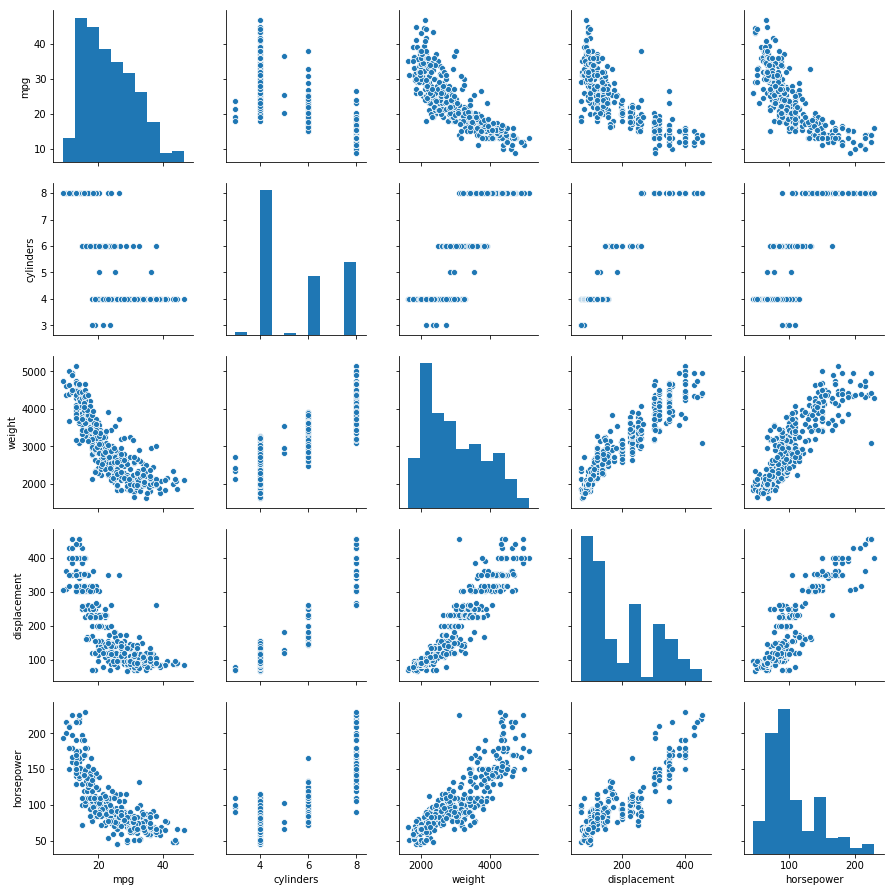

In [39]:
#EDA exporitory analisis* spelling is off.

import seaborn as sns
column_need=['mpg','cylinders','weight','displacement','horsepower']
sns.pairplot(df[column_need])

In [41]:
#sns.pairplot(df)

In [43]:
sns.set(color_codes=True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


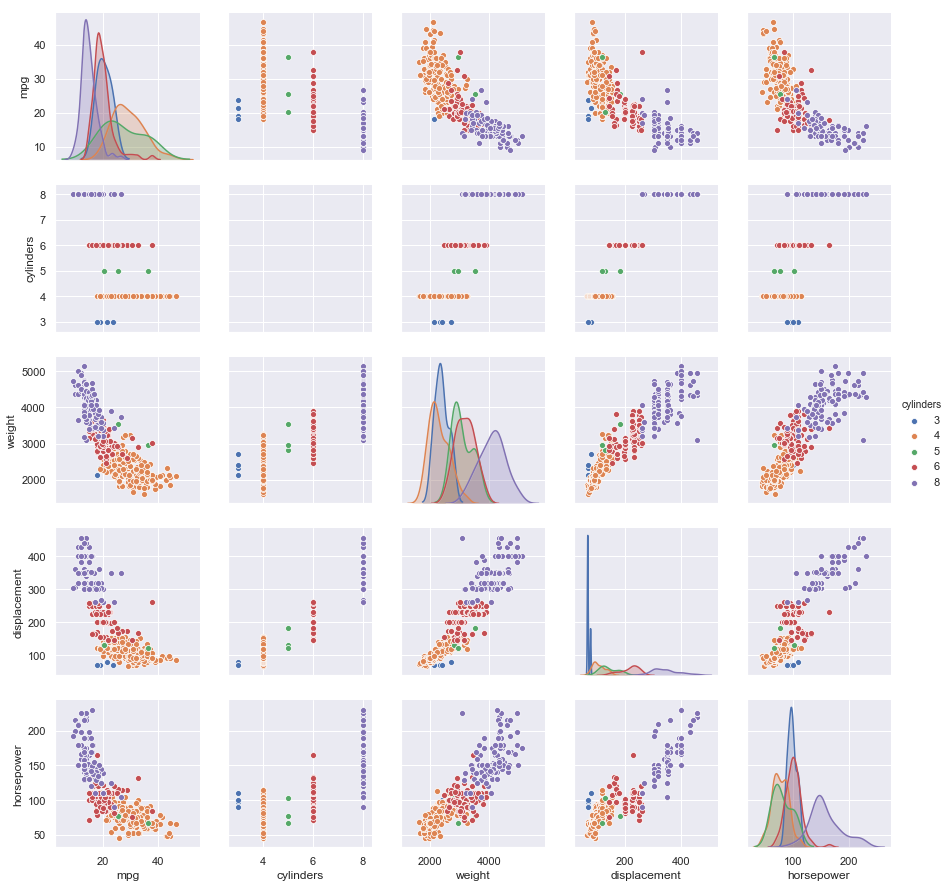

In [48]:
g=sns.pairplot(df[column_need],hue='cylinders')
g.savefig('output.png')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


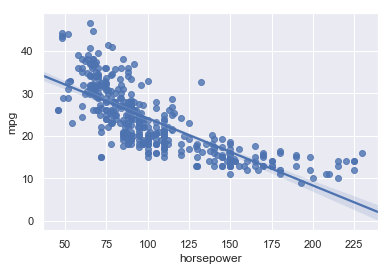

In [51]:
sns.regplot(x='horsepower',y='mpg',data=df)
# Generalize line(regression line)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


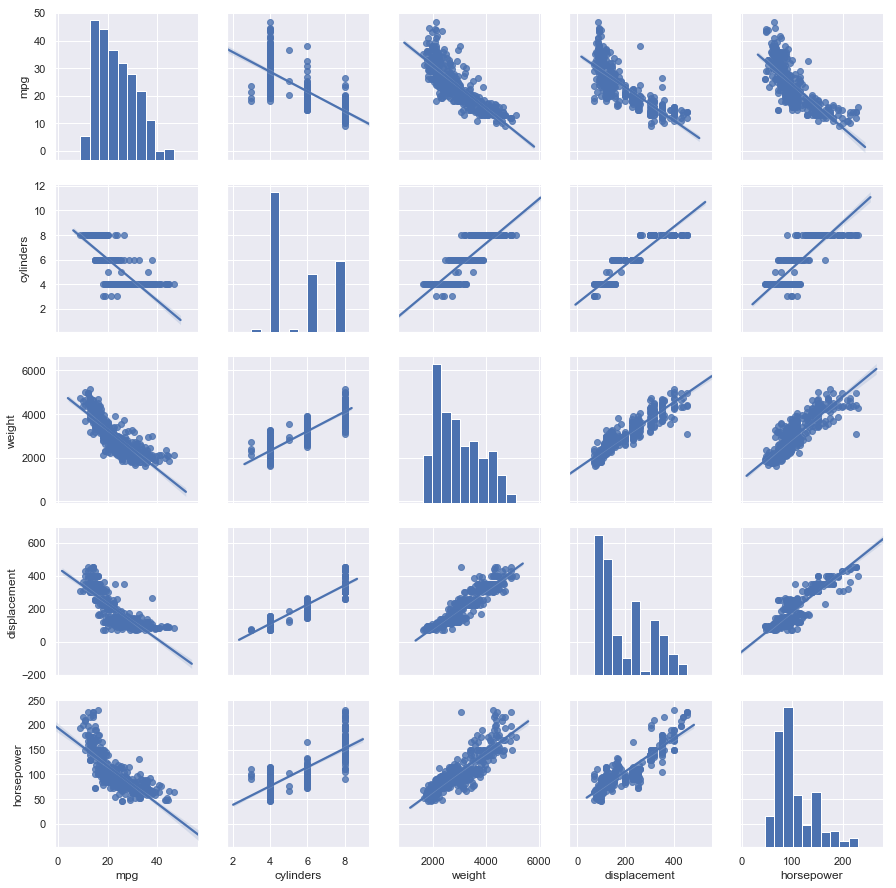

In [52]:
sns.pairplot(df[column_need],kind='reg')

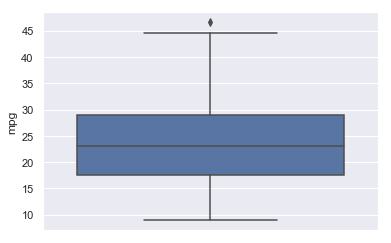

In [56]:
sns.boxplot(df['mpg'],orient='v')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


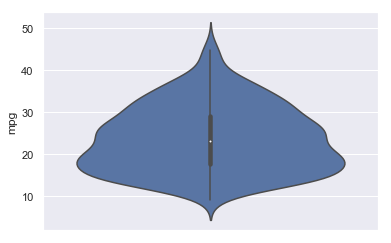

In [59]:
sns.violinplot(y='mpg',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


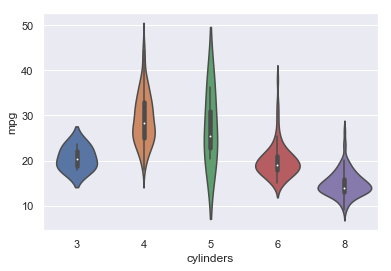

In [60]:
sns.violinplot(x='cylinders',y='mpg',data=df)

In [63]:
corr=df[column_need].corr()

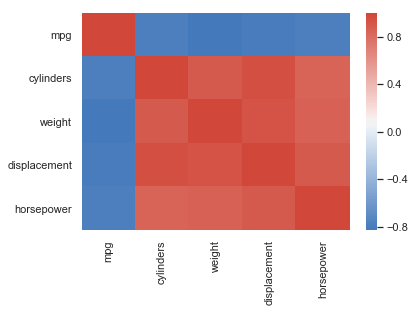

In [95]:
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, cmap=sns.diverging_palette(250,15,as_cmap=True))

# Merge, or join
** we will join two data frames

In [102]:
result = pd.DataFrame(df.groupby(['cylinders'])['horsepower'].aggregate('mean'))

In [103]:
result.head()

,horsepower
cylinders,
3,99.250000
4,78.281407
5,82.333333
6,101.506024
8,158.300971


In [110]:
new_df=pd.merge(df[column_need],result,how='left',left_on=['cylinders'],right_on=['cylinders'])

In [112]:
new_df.head()

,mpg,cylinders,weight,displacement,horsepower_x,horsepower_y
0,18.0,8,3504,307.0,130.0,158.300971
1,15.0,8,3693,350.0,165.0,158.300971
2,18.0,8,3436,318.0,150.0,158.300971
3,16.0,8,3433,304.0,150.0,158.300971
4,17.0,8,3449,302.0,140.0,158.300971


# Homework from class 4
# Perform all the functions on the cheat sheet using auto-mpg data set
# replace the null values in HP with the average of origin and cylinders
# Perform that replacement using group by and merge function
# Extra Credit: Create your own cheat sheet based on Class 3, 4 including plots
# send an .iypn from github. 